# CSSE COVID-19(US)(21-05-2020)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data set
df = pd.read_csv("csse_covid_19.csv")
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [3]:
#check shape of the dataset
df.shape

(58, 18)

In [4]:
#check null values
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

From the above observation, there are null values present in many columns and need to fill those columns. 

In [5]:
#check number of unique values in each columns.
df.nunique()

Province_State          58
Country_Region           1
Last_Update              1
Lat                     56
Long_                   56
Confirmed               58
Deaths                  56
Recovered               42
Active                  58
FIPS                    58
Incident_Rate           56
People_Tested           56
People_Hospitalized     33
Mortality_Rate          57
UID                     58
ISO3                     6
Testing_Rate            56
Hospitalization_Rate    33
dtype: int64

Country_region and last_update columns have only one value.so, we have to drop this columns because this columns don't affect our dataset.

In [6]:
#drop unnecessary attributes.
df.drop(["Country_Region","Last_Update"],axis=1,inplace=True)

In [7]:
#drop FIPS,UID and ISO3 attribute because all columns contain identification and don't useful for our model.
df.drop(["FIPS","UID","ISO3"],axis=1,inplace=True)

In [8]:
# fill null values with mean,mode and respective calculation.
df["Lat"] = df["Lat"].fillna(df["Lat"].mean())
df["Long_"] = df["Long_"].fillna(df["Long_"].mean())
df["Incident_Rate"] = df["Incident_Rate"].fillna(df["Incident_Rate"].mean())
df["People_Tested"] = df["People_Tested"].fillna(df["People_Tested"].mean())
df["Testing_Rate"] = df["Testing_Rate"].fillna(df["Testing_Rate"].mean())

df["Recovered"] = df["Recovered"].fillna(df["Confirmed"]-df["Deaths"]-df["Active"])
df["People_Hospitalized"] = df["People_Hospitalized"].fillna(df["People_Hospitalized"].mode()[0])
df["Mortality_Rate"] = df["Mortality_Rate"].fillna(0)
df["Hospitalization_Rate"] = df["Hospitalization_Rate"].fillna((df["People_Hospitalized"]*100)/df["Confirmed"])

In [9]:
df.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,0.0,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.0,39.0,54.815493,37045.0,65.0,2.493766,5063.940017,16.209476
2,American Samoa,-14.2710,-170.1320,0,0,0.0,0.0,0.000000,124.0,65.0,0.000000,222.857246,inf
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584


In [10]:
#One value of hospitalization_rate give infinie value because of zero case of covid-19  and convert it with zero 
df.at[2,"Hospitalization_Rate"] = 0

In [11]:
#check null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Lat                   58 non-null     float64
 2   Long_                 58 non-null     float64
 3   Confirmed             58 non-null     int64  
 4   Deaths                58 non-null     int64  
 5   Recovered             58 non-null     float64
 6   Active                58 non-null     float64
 7   Incident_Rate         58 non-null     float64
 8   People_Tested         58 non-null     float64
 9   People_Hospitalized   58 non-null     float64
 10  Mortality_Rate        58 non-null     float64
 11  Testing_Rate          58 non-null     float64
 12  Hospitalization_Rate  58 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 6.0+ KB


## Univariate Analysis

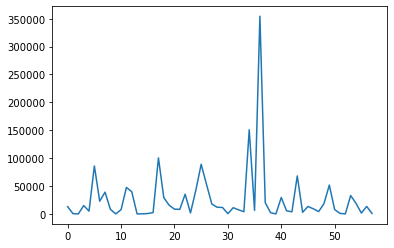

In [12]:
plt.plot(df["Confirmed"])

Maximum confirmed cases in one of the state of the US is approx.350000 on the date of May-21-2020.

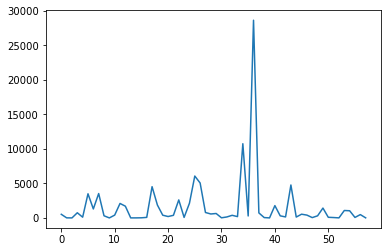

In [13]:
plt.plot(df["Deaths"])

Maximum deaths occured in one of the states of US is nearby 30000 on the date of May-21-2020.

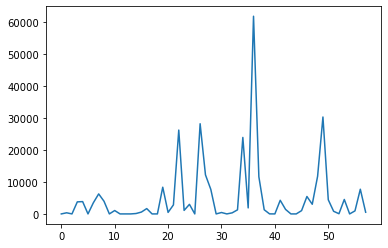

In [14]:
plt.plot(df["Recovered"])

Maximum recoverd cases in single state is approx. 61000 on the date of may-21-2020.

In [15]:
# Check Total confirmed cases in US on the date of 21-05-2020.
df["Confirmed"].sum()

1551853

In [16]:
# Check Total Deaths in US on the date of 21-05-2020.
df["Deaths"].sum()

93439

In [17]:
# Check Total recovered cases in US on the date of 21-05-2020.
df["Recovered"].sum()

294312.0

In [18]:
# Check Total people tested in US on the date of 21-05-2020.
df["People_Tested"].sum()

13099497.82142857

## Bivariate Analysis

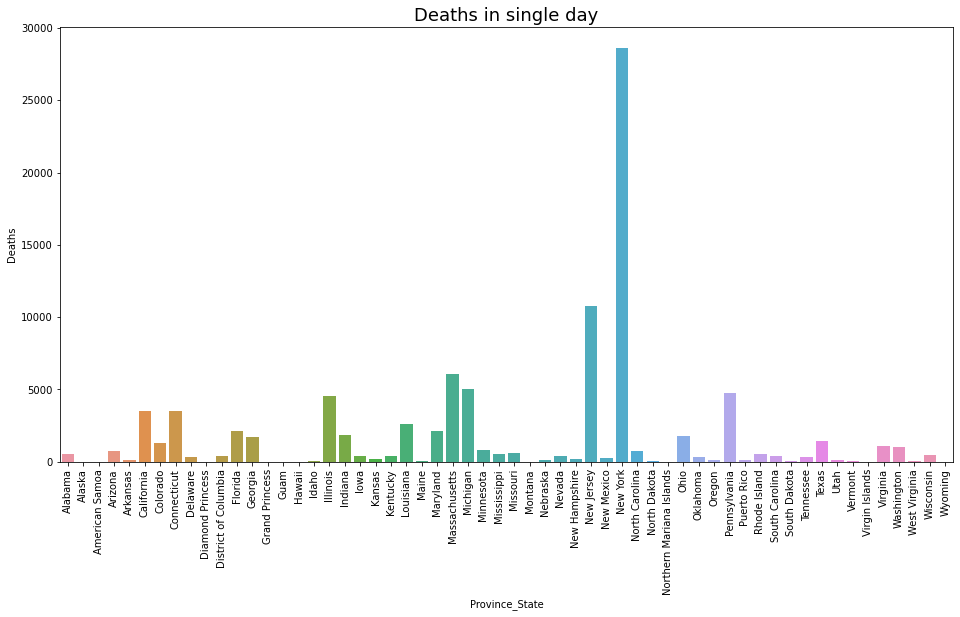

In [19]:
plt.figure(figsize=(16,8))
sns.barplot(x="Province_State",y="Deaths",data=df)
plt.title("Deaths in single day",fontsize=18)
plt.xticks(rotation="vertical")
plt.show()

Maximum Deaths had occured in New York on the date of May-21-2020.

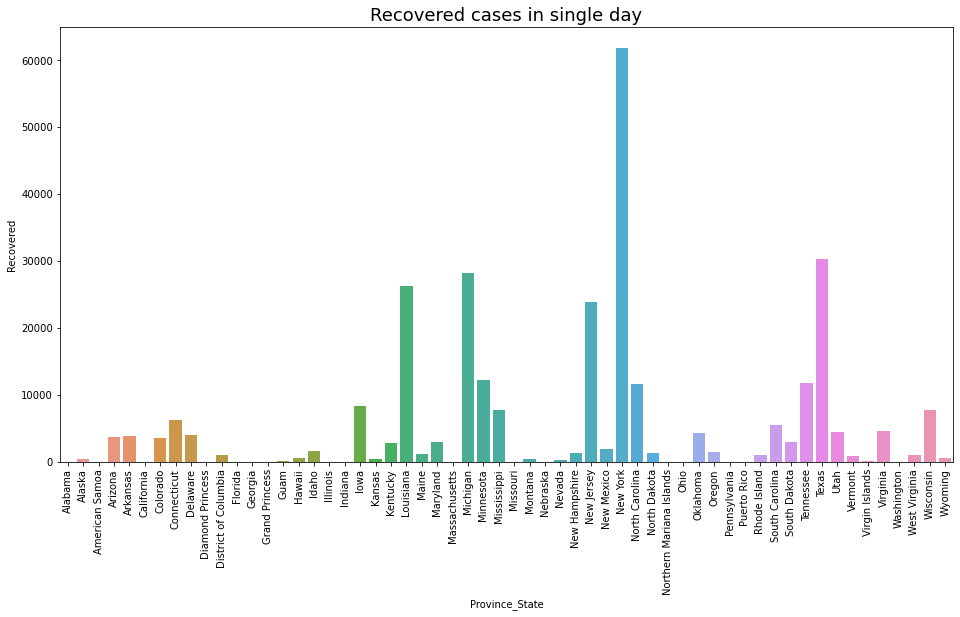

In [20]:
plt.figure(figsize=(16,8))
sns.barplot(x="Province_State",y="Recovered",data=df)
plt.title("Recovered cases in single day",fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

Maximum recoverd cases in single day is nearby 60000 in New York. 

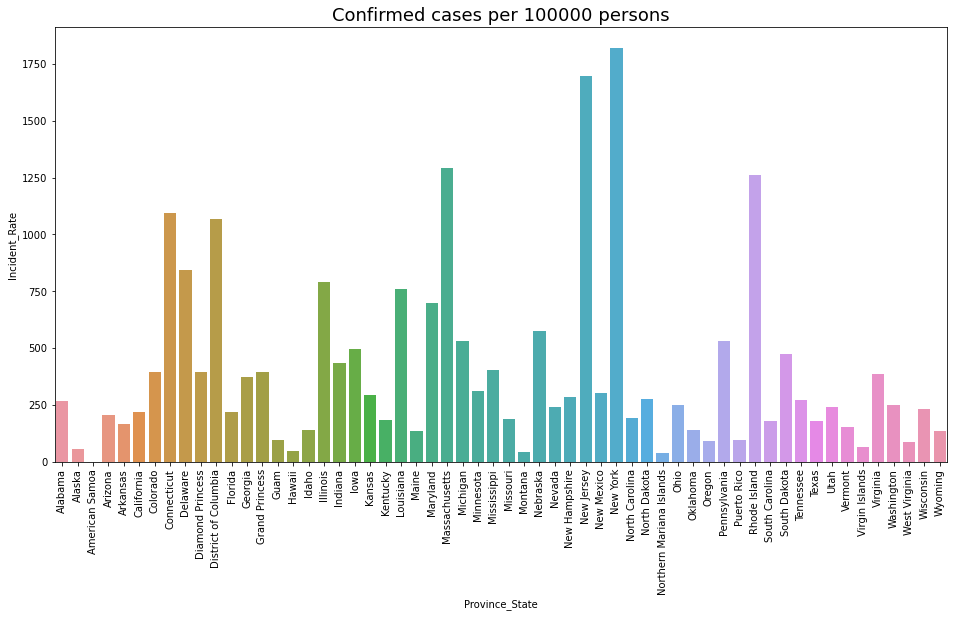

In [21]:
plt.figure(figsize=(16,8))
sns.barplot(x="Province_State",y="Incident_Rate",data=df)
plt.title("Confirmed cases per 100000 persons",fontsize=18)
plt.xticks(rotation="vertical")
plt.show()

Confirmed cases per 100000 persons is high in New York and New Jersey,while zero case in American Samoa on the date of may-21-2020.

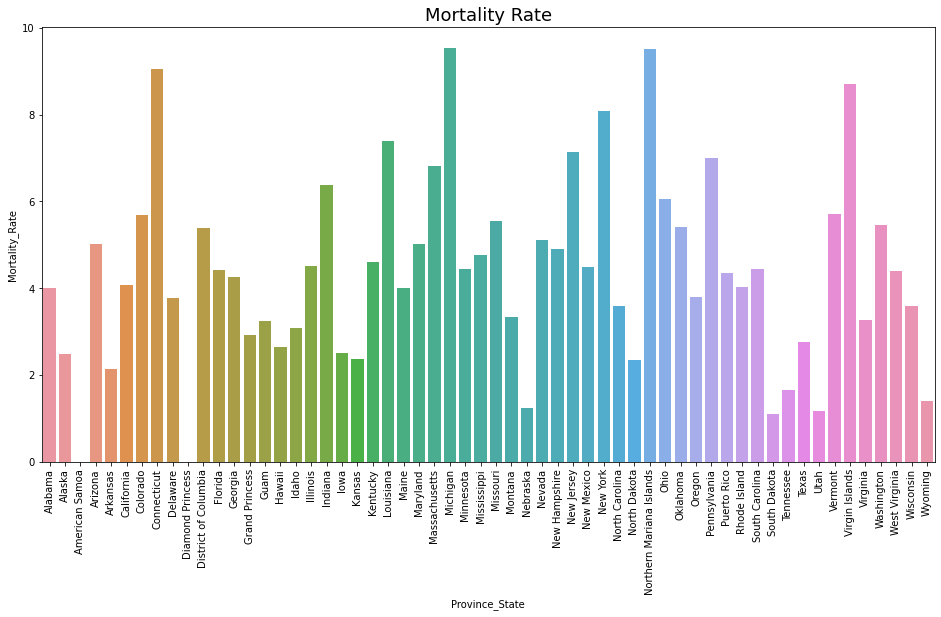

In [22]:
plt.figure(figsize=(16,8))
sns.barplot(x="Province_State",y="Mortality_Rate",data=df)
plt.title("Mortality Rate",fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

Mortality rate is very high in Northan Mariana Islands and Michigan on the date of May-21-2020.

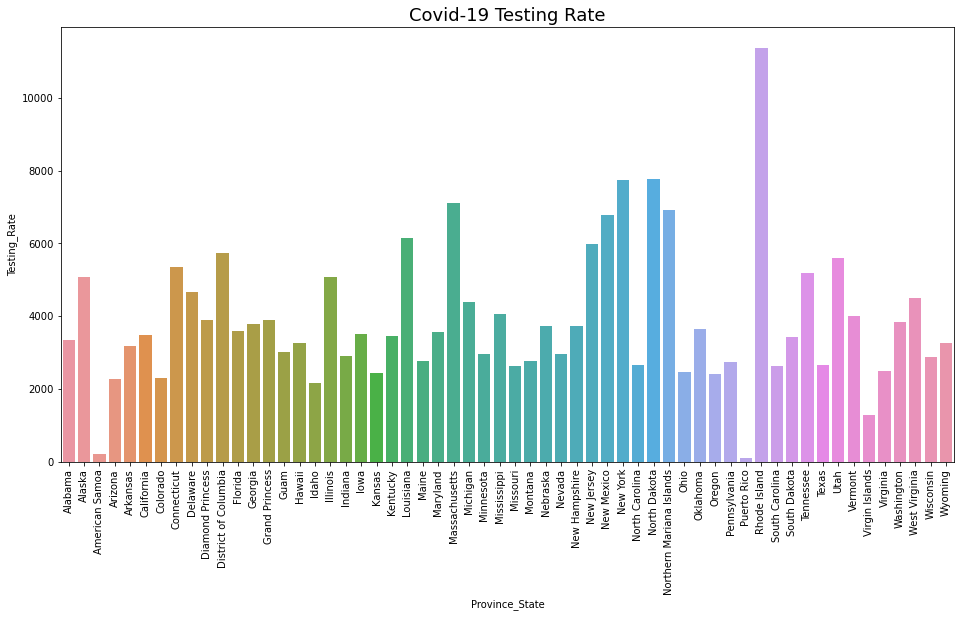

In [23]:
plt.figure(figsize=(16,8))
sns.barplot(x="Province_State",y="Testing_Rate",data=df)
plt.title("Covid-19 Testing Rate",fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

Covid-19 testing rate is high in Rhode island and low in Puerto Rico on the date of may-21-2020.

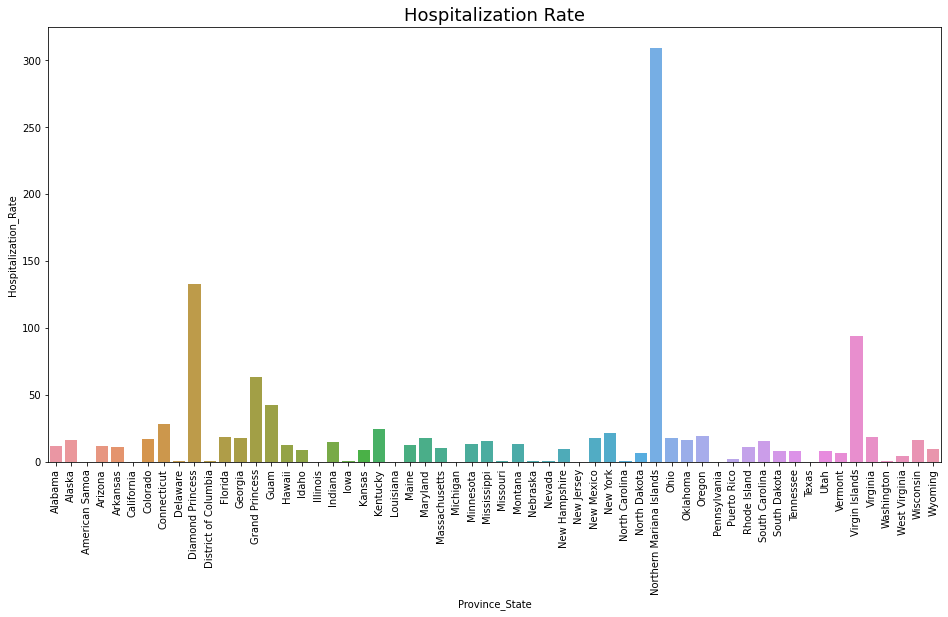

In [24]:
plt.figure(figsize=(16,8))
sns.barplot(x="Province_State",y="Hospitalization_Rate",data=df)
plt.title("Hospitalization Rate",fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

Hospitalization rate is maximum in Northern Mariana Islands,Diamond Princess is at second place and Virgin Islands at third place in terms of hospitalization rate.

## Multivariate Analysis

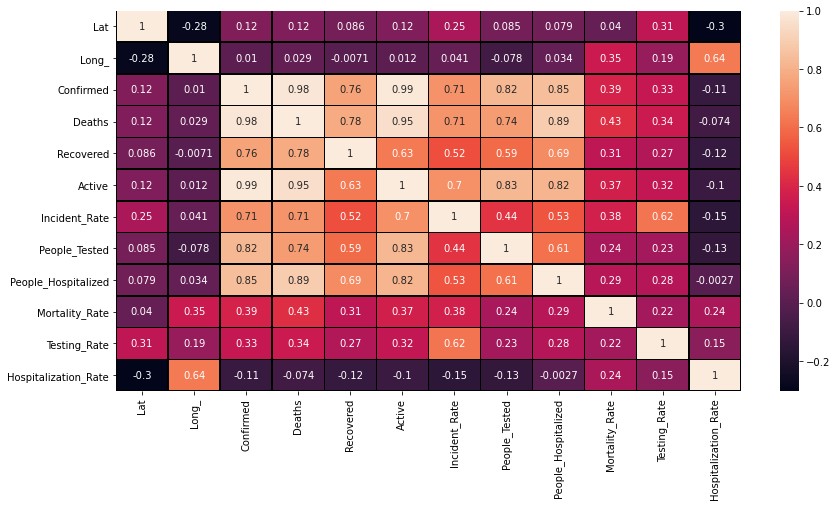

In [25]:
#check correlation of every columns by plotting heatmap
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black")
plt.show()

Deaths and recovered columns is highly positive correlated with confirmed,active,incident rate,people tested and people hospitalized attributes.

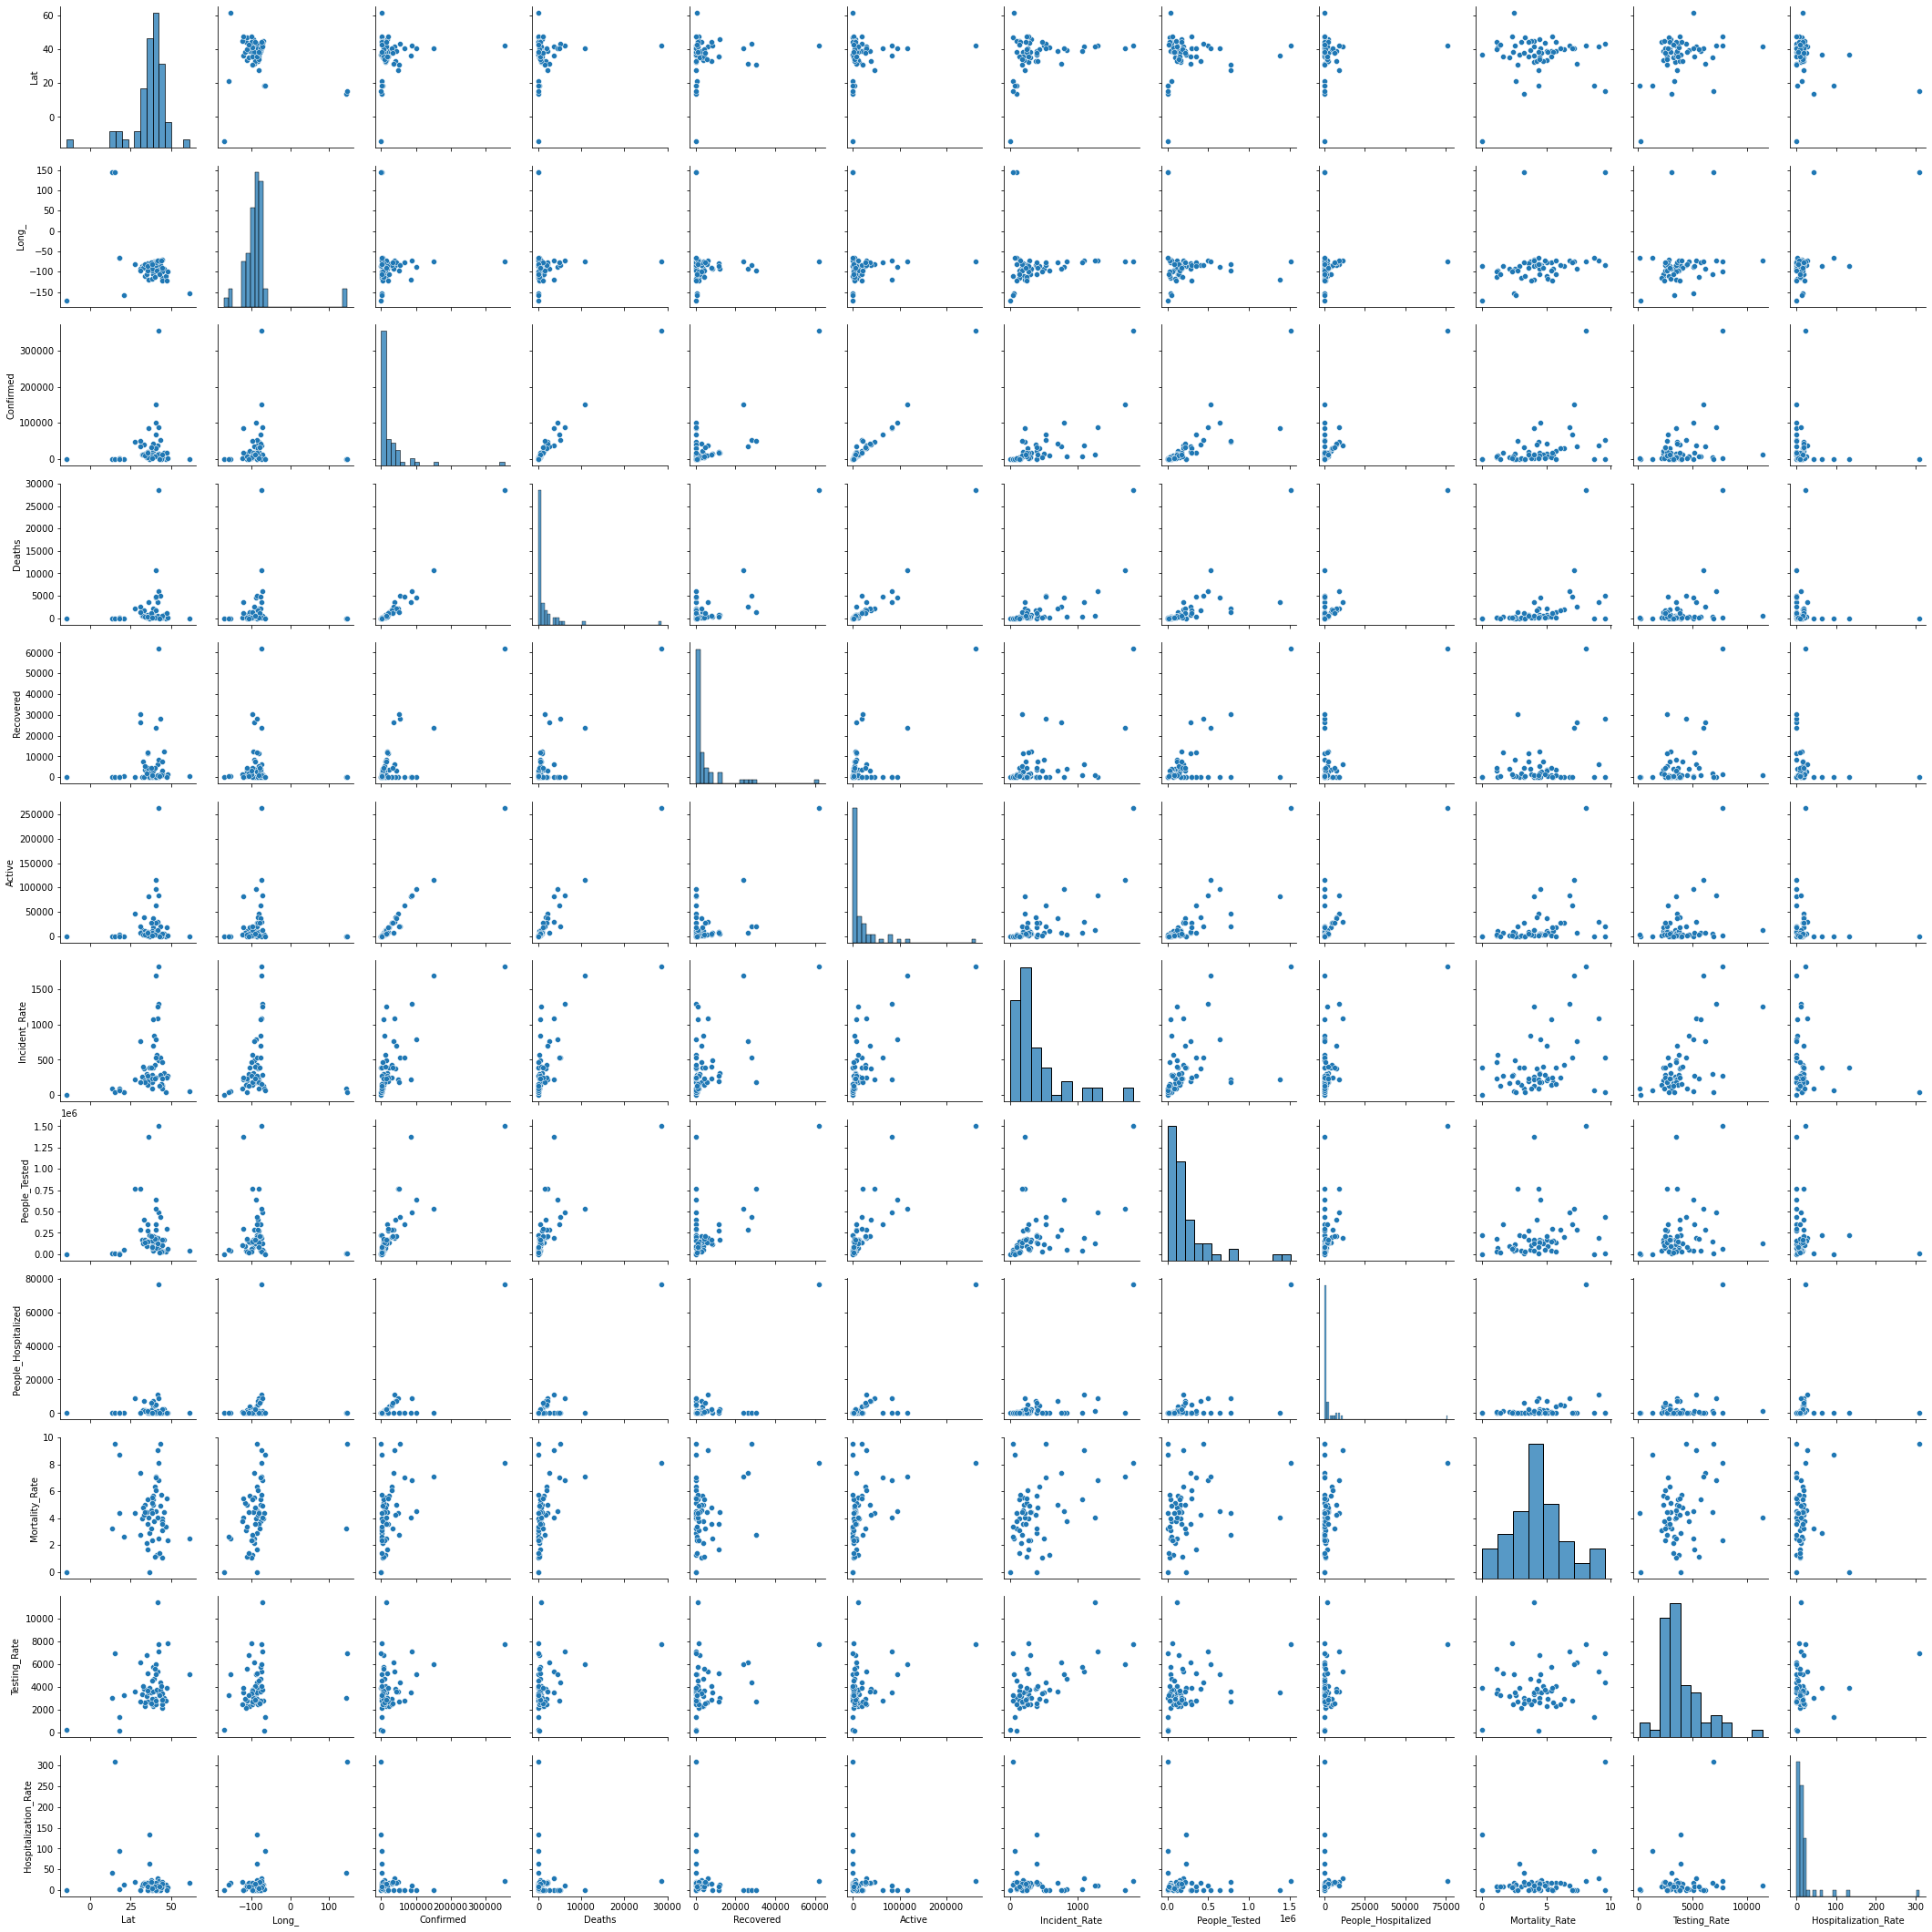

In [26]:
sns.pairplot(df)

From the above plots, we can check correlation of every attributes with each other.

<AxesSubplot:xlabel='Deaths', ylabel='Active'>

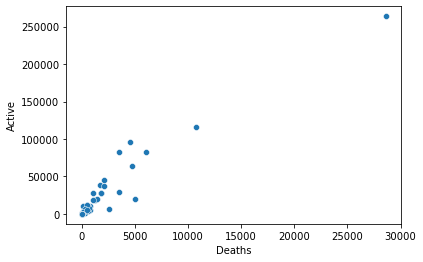

In [27]:
sns.scatterplot(df["Deaths"],df["Active"])

<AxesSubplot:xlabel='Deaths', ylabel='Recovered'>

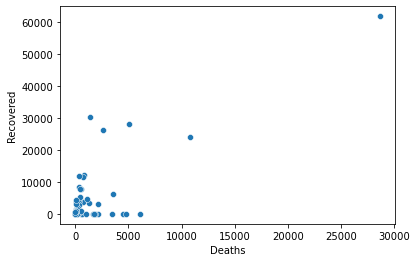

In [28]:
sns.scatterplot(df["Deaths"],df["Recovered"])

In [29]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,5074.344828,20070.724138,396.230806,2.258534e+05,2814.500000,4.381382,3894.186870,19.827282
std,10.694329,48.873770,52562.031122,4084.750891,10393.125384,41294.705318,395.554852,2.934948e+05,10170.231854,2.195667,1898.951207,44.559907
min,-14.271000,-170.132000,0.000000,0.000000,0.000000,0.000000,0.000000,1.240000e+02,65.000000,0.000000,97.702058,0.000000
25%,34.872800,-99.697700,2596.000000,74.000000,0.000000,812.500000,154.909239,4.745000e+04,65.000000,2.952622,2741.843521,0.865561
50%,38.978600,-86.797300,10148.500000,385.000000,1079.500000,5644.500000,259.009335,1.433085e+05,178.500000,4.382399,3501.526835,10.909835
75%,42.214075,-77.072550,29395.500000,1394.250000,4383.750000,19291.250000,462.828082,2.646656e+05,1722.750000,5.450908,4622.586404,17.438226
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424693,309.523810


1. There is large difference between 75% of the data and maximun values of the data. it depicts the outliers present in the data and need to remove. 
2. There is large difference between mean and standard deviation in most of columns. it represents the skewness is present in data and need to remove.

In [30]:
#convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Province_State"]=le.fit_transform(df["Province_State"])
df.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,0.0,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
1,1,61.3707,-152.4044,401,10,352.0,39.0,54.815493,37045.0,65.0,2.493766,5063.940017,16.209476
2,2,-14.2710,-170.1320,0,0,0.0,0.0,0.000000,124.0,65.0,0.000000,222.857246,0.000000
3,3,33.7298,-111.4312,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,4,34.9697,-92.3731,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584


## Handling Outliers

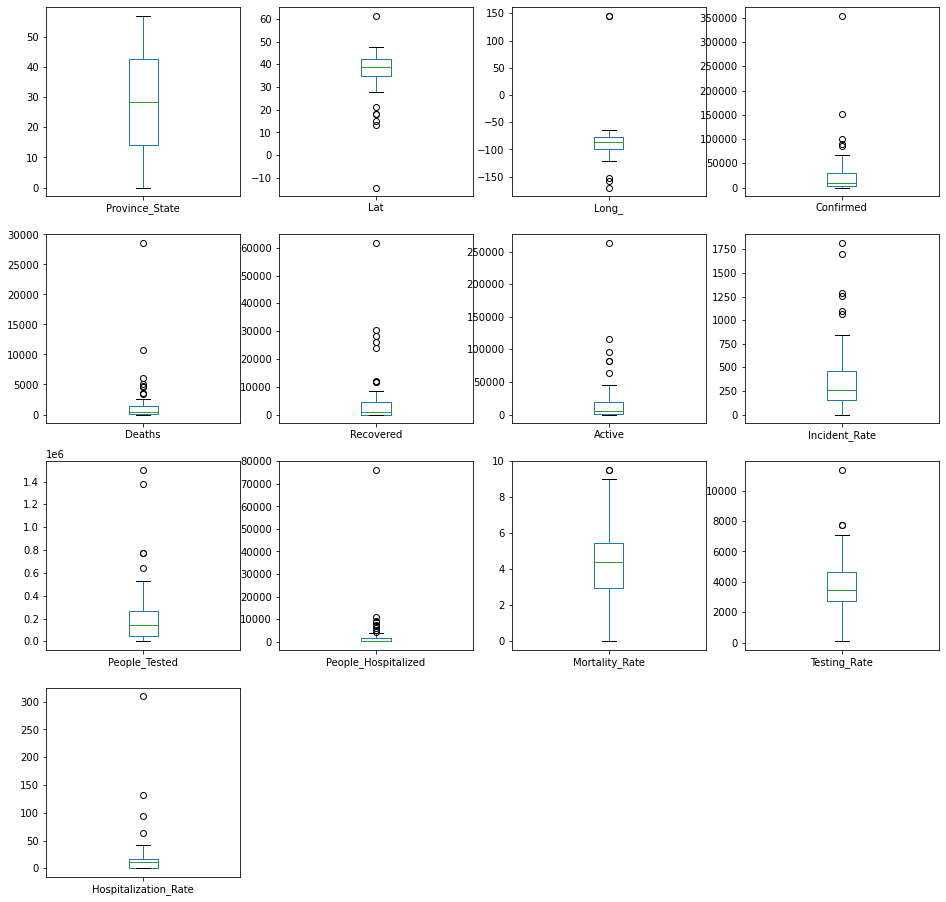

In [31]:
df.plot(kind="box",layout = (4,4),figsize=(16,16),subplots=True)
plt.show()

From the above observation,We can see outliers present in every attributes and need to remove.

In [32]:
#check and remove outliers with zscore
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
print(np.where(z>3))

(array([ 2,  5, 14, 34, 36, 36, 36, 36, 36, 36, 36, 39, 39, 45],
      dtype=int64), array([ 1,  8,  2,  7,  3,  4,  5,  6,  7,  8,  9,  2, 12, 11],
      dtype=int64))


In [33]:
df_new = df[(z<3).all(axis=1)]
df_new.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,0.0,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
1,1,61.3707,-152.4044,401,10,352.0,39.0,54.815493,37045.0,65.0,2.493766,5063.940017,16.209476
3,3,33.7298,-111.4312,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,4,34.9697,-92.3731,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584
6,6,39.0598,-105.3111,22797,1299,3478.0,18020.0,395.868121,131837.0,3955.0,5.698118,2289.339188,17.348774


In [34]:
print(df.shape)
print(df_new.shape)

(58, 13)
(51, 13)


In [35]:
percentage_loss = ((58-51)/58)*100
percentage_loss

12.068965517241379

percentage loss of data is higher by applying zscore for remove outliers.so, we don't use this method and try another method.

In [36]:
#check and remove outliers by using inter qurtile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Province_State              28.500000
Lat                          7.341275
Long_                       22.625150
Confirmed                26799.500000
Deaths                    1320.250000
Recovered                 4383.750000
Active                   18478.750000
Incident_Rate              307.918843
People_Tested           217215.602679
People_Hospitalized       1657.750000
Mortality_Rate               2.498285
Testing_Rate              1880.742883
Hospitalization_Rate        16.572665
dtype: float64


In [37]:
df_new1 = df[~((df < (Q1 - 1.5 * IQR))| (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new1.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,0.0,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
3,3,33.7298,-111.4312,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,4,34.9697,-92.3731,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584
6,6,39.0598,-105.3111,22797,1299,3478.0,18020.0,395.868121,131837.0,3955.0,5.698118,2289.339188,17.348774
8,8,39.3185,-75.5071,8194,310,3965.0,3919.0,841.476990,45412.0,65.0,3.783256,4663.552976,0.793263


In [38]:
print(df.shape)
print(df_new1.shape)

(58, 13)
(27, 13)


Here,percentage loss of data is also higher and we don't apply this method. 

## Prepare data for model training

In [39]:
#our target variable is deaths. so, it is regression problem and take deaths column as y variable.
x = df.drop(["Deaths"],axis=1)
y = df["Deaths"]

## Handling skewness

In [40]:
#check skewness
df.skew()

Province_State          0.000000
Lat                    -2.250097
Long_                   3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.649556
Active                  4.180953
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.893838
Mortality_Rate          0.400879
Testing_Rate            1.313407
Hospitalization_Rate    5.361380
dtype: float64

Skewness is present in data and need to remove.let's check skewness through distribution plot.

<AxesSubplot:xlabel='Long_', ylabel='Density'>

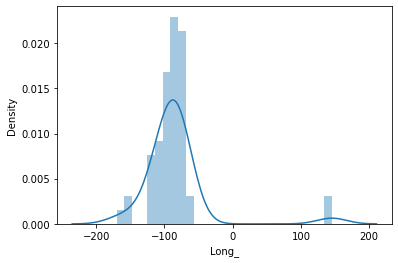

In [41]:
sns.distplot(df["Long_"])

<AxesSubplot:xlabel='Confirmed', ylabel='Density'>

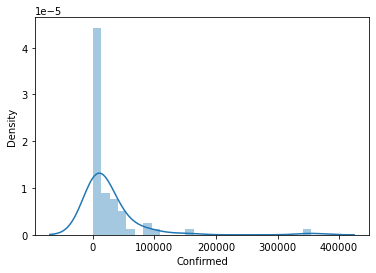

In [42]:
sns.distplot(df["Confirmed"])

<AxesSubplot:xlabel='Recovered', ylabel='Density'>

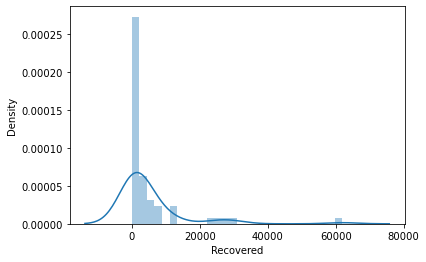

In [43]:
sns.distplot(df["Recovered"])

<AxesSubplot:xlabel='Active', ylabel='Density'>

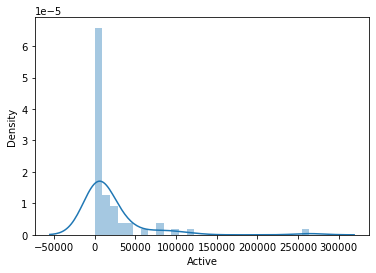

In [44]:
sns.distplot(df["Active"])

<AxesSubplot:xlabel='People_Hospitalized', ylabel='Density'>

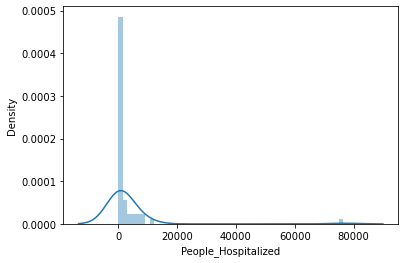

In [45]:
sns.distplot(df["People_Hospitalized"])

In [46]:
#remove skewness using power transform method
#from sklearn.preprocessing import power_transform
#x = power_transform(x,method='yeo-johnson')
# here,we dont remove skewness because it badly affect our model.

## Scaling data

In [47]:
#scaling data with mean=0 and unit varience
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_t,y,test_size=0.10,random_state=0)

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(52, 12)
(6, 12)
(52,)
(6,)


## Find best model

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr_d = LinearRegression()

lr_d.fit(x_train,y_train)
train = lr_d.score(x_train,y_train)
predlr_d = lr_d.predict(x_test)
print("Model training accuracy is:",train)
print("r2 score:",r2_score(y_test,predlr_d)*100)
print("mean squared error:",mean_squared_error(y_test,predlr_d))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predlr_d)))

Model training accuracy is: 1.0
r2 score: 100.0
mean squared error: 8.514101113290602e-22
root mean squared error: 2.917893266260882e-11


In [51]:
#check model accuracy with cross validation
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(lr_d,x_t,y,cv=8)
print(accuracy)
print("Accuracy of model is:",accuracy.mean()*100)

[1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy of model is: 100.0


In [52]:
#now take recovered cases as our target variable
x = df.drop(["Recovered"],axis=1)
y = df["Recovered"]

In [53]:
#scaling data
x_r = sc.fit_transform(x)

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x_r,y,test_size=0.10,random_state=0)

In [55]:
lr_r = LinearRegression()
lr_r.fit(x_train,y_train)
train = lr_r.score(x_train,y_train)
predlr_r = lr_r.predict(x_test)
print("Model training accuracy is:",train)
print("r2 score:",r2_score(y_test,predlr_r)*100)
print("mean squared error:",mean_squared_error(y_test,predlr_r))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,predlr_r)))

Model training accuracy is: 1.0
r2 score: 100.0
mean squared error: 1.8999304694577354e-21
root mean squared error: 4.3588191858090825e-11


In [56]:
#check model accuracy with cross validation
accuracy = cross_val_score(lr_r,x_r,y,cv=8)
print(accuracy)
print("Accuracy of model is:",accuracy.mean()*100)

[1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy of model is: 100.0


In [57]:
#save best result of deaths
df1 = pd.DataFrame(predlr_d)
df1.to_csv("lr_d_csse_covid-19.csv")
#save best result of recoverd cases
df2 = pd.DataFrame(predlr_r)
df2.to_csv("lr_r_csse_covid-19.csv")

In [59]:
#save best model of deaths
import joblib
joblib.dump(lr_d,"lr_d_csse_covid-19.obj")
#save bes model of recoverd cases
joblib.dump(lr_r,"lr_r_csse_covid-19.obj")

['lr_r_csse_covid-19.obj']